In [1]:
# Import Necessary Libraries
import pandas as pd
import numpy as np 
from sklearn.preprocessing import OneHotEncoder
import tensorflow.keras as keras
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Dense, Activation, Dropout, LSTM, Bidirectional,SimpleRNN,GRU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import os
from keras.layers import Input, LSTM, Embedding, Dense
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM, Dropout
from keras.callbacks import LambdaCallback
from keras.layers import TimeDistributed
from keras.optimizers import RMSprop
from keras.utils import plot_model
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras import layers
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
import re
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [4]:
#Load Data from GDrive
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/imdb.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load Data from Local
df = pd.read_csv('imdb.csv')

# Data Preprocessing and Tokenizing


In [5]:
def preprocess_reviews(reviews):
    reviews_processed = reviews.str.replace('<br />','')
    reviews_processed = reviews.str.lower()
    return reviews_processed

df['review'] = preprocess_reviews(df['review'])

X = df['review'].values
y = df['sentiment'].apply(lambda x:1 if x=='positive' else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, shuffle=True)

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train_token = tokenizer.texts_to_sequences(X_train)
X_test_token = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

In [6]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

# Model 1 ANN

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 100, 50)           5718000   
                                                                 
 dense_22 (Dense)            (None, 100, 10)           510       
                                                                 
 dense_23 (Dense)            (None, 100, 1)            11        
                                                                 
Total params: 5,718,521
Trainable params: 5,718,521
Non-trainable params: 0
_________________________________________________________________
Epoch 1/6
1250/1250 [==============================] - 92s 73ms/step - loss: 0.6807 - accuracy: 0.5518 - val_loss: 0.6786 - val_accuracy: 0.5559
Epoch 2/6
1250/1250 [==============================] - 93s 75ms/step - loss: 0.6781 - accuracy: 0.5554 - val_loss: 0.6785 - val_accuracy: 0.5563
Epoch 3/6
1250/12

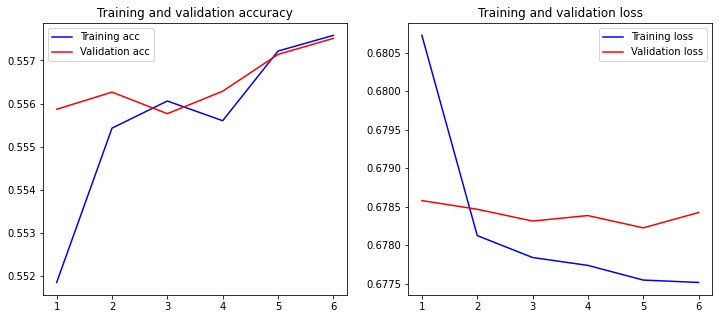

In [ ]:
maxlen = 100
X_train = pad_sequences(X_train_token, padding='pre', maxlen=maxlen)
X_test = pad_sequences(X_test_token, padding='pre', maxlen=maxlen)

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train,
                    epochs=6,
                    # verbose=True,
                    validation_data=(X_test, y_test))#,
                    # batch_size=50)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

# Model_2 LSTM

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 50)           5618200   
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense_8 (Dense)             (None, 10)                510       
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 5,638,921
Trainable params: 5,638,921
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1250/1250 [==============================] - 78s 62ms/step - loss: 145315312.0000 - accuracy: 0.6962 - val_loss: 0.5815 - val_accuracy: 0.7212
Epoch 2/5
1250/1250 [==

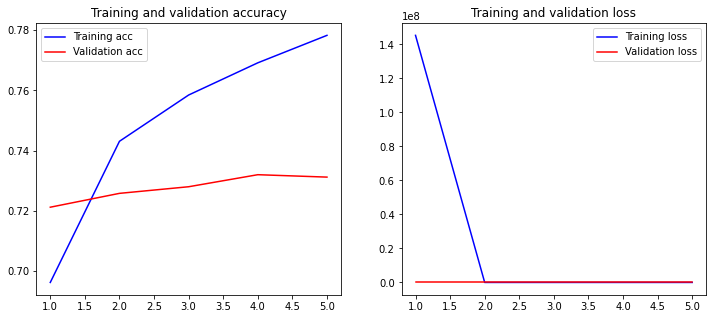

In [55]:
maxlen = 100
X_train = pad_sequences(X_train_token, padding='pre', maxlen=maxlen)
X_test = pad_sequences(X_test_token, padding='pre', maxlen=maxlen)

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.LSTM(50,activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train,
                    epochs=5,
                    # verbose=True,
                    validation_data=(X_test, y_test))#,
                    # batch_size=50)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

# Model_3 RNN

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 50)           5618200   
                                                                 
 simple_rnn (SimpleRNN)      (None, 50)                5050      
                                                                 
 dense (Dense)               (None, 10)                510       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 5,623,771
Trainable params: 5,623,771
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1250/1250 [==============================] - 62s 48ms/step - loss: 0.4930 - accuracy: 0.7520 - val_loss: 0.3591 - val_accuracy: 0.8458
Epoch 2/5
1250/1250 [============

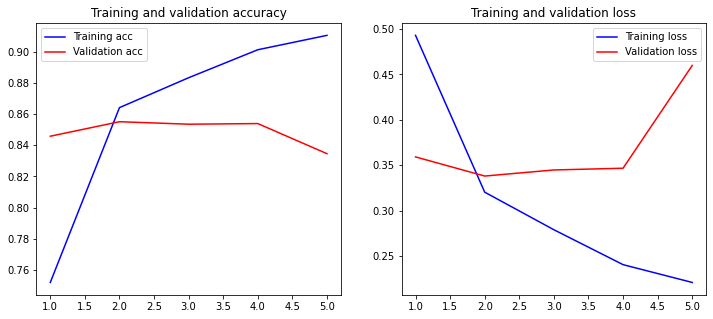

In [43]:
maxlen = 100
X_train = pad_sequences(X_train_token, padding='pre', maxlen=maxlen)
X_test = pad_sequences(X_test_token, padding='pre', maxlen=maxlen)

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.SimpleRNN(50,activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train,
                    epochs=5,
                    # verbose=True,
                    validation_data=(X_test, y_test))#,
                    # batch_size=50)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

# Model_4 GRU

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, 100, 50)           5718000   
                                                                 
 gru_4 (GRU)                 (None, 50)                15300     
                                                                 
 dense_34 (Dense)            (None, 10)                510       
                                                                 
 dense_35 (Dense)            (None, 1)                 11        
                                                                 
Total params: 5,733,821
Trainable params: 5,733,821
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1250/1250 [==============================] - 121s 95ms/step - loss: 0.7182 - accuracy: 0.7481 - val_loss: 0.3955 - val_accuracy: 0.8300
Epoch 2/5
1250/1250 [========

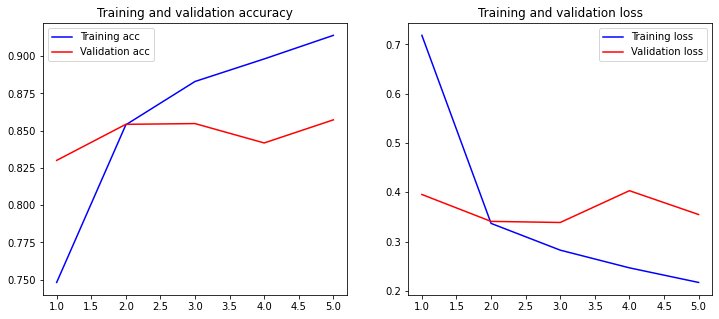

In [ ]:
maxlen = 100
X_train = pad_sequences(X_train_token, padding='pre', maxlen=maxlen)
X_test = pad_sequences(X_test_token, padding='pre', maxlen=maxlen)

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GRU(50,activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train,
                    epochs=5,
                    # verbose=True,
                    validation_data=(X_test, y_test))#,
                    # batch_size=50)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

# Language Model

In [ ]:


df_darkknight = pd.read_csv('../2_reviews_per_movie_raw/3 Idiots 2009.csv')
def preporcessing(df_darkknight):
    for i in range(len(df_darkknight)):
        df_darkknight['review'].iloc[i] = df_darkknight['review'].iloc[i].replace('<br/>',' ')
        df_darkknight['review'].iloc[i] = df_darkknight['review'].iloc[i].replace('\n',' ')
        df_darkknight['review'].iloc[i] = re.sub(r'[^\w\s]', '', df_darkknight['review'].iloc[i])
        df_darkknight['review'].iloc[i] = df_darkknight['review'].iloc[i].lower()
    return df_darkknight
        
df_darkknight_20 = preporcessing(df_darkknight[:3])

In [ ]:
df_darkknight_text = " ".join(w for word in df_darkknight_20['review'] for w in word.split())

In [ ]:
tokenizer = Tokenizer()

#storing the training sequence in a single string variable
sentence = df_darkknight_text
corpus = list(set(sentence.lower().split("\n"))) #converting the sentence to lowercase and storing each word as a separate iterable string in a list

tokenizer.fit_on_texts(corpus) #creates tokens of each words as a dictionary with key being word and the value beings its token
total_words = len(tokenizer.word_index) + 1 #calculating total number of words in the initial sentence



In [ ]:
input_sequences = [] 

for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0] 
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1] 
        
        input_sequences.append(n_gram_sequence)
        


max_sequence_len = max([len(x) for x in input_sequences]) 
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre')) #pre-pading each value of the input_sequence

xs, labels = input_sequences[:,:-1],input_sequences[:,-1] 
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words) 

In [ ]:
model = Sequential() #creating a sequential model
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1)) #adding an embedding layer with 64 as the embedding dimension
model.add(Bidirectional(LSTM(20))) #adding 20 LSTM units
model.add(Dense(total_words, activation='softmax')) #creating a dense layer with 54 output units (total_words) with softmax activation
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #compiling the model with adam optimiser
history = model.fit(xs, ys, epochs=240, verbose=1) 

Epoch 1/240
19/19 [==============================] - 17s 484ms/step - loss: 5.7129 - accuracy: 0.0214
Epoch 2/240
19/19 [==============================] - 9s 482ms/step - loss: 5.6549 - accuracy: 0.0313
Epoch 3/240
19/19 [==============================] - 8s 439ms/step - loss: 5.5015 - accuracy: 0.0329
Epoch 4/240
19/19 [==============================] - 8s 447ms/step - loss: 5.3177 - accuracy: 0.0445
Epoch 5/240
19/19 [==============================] - 9s 478ms/step - loss: 5.2709 - accuracy: 0.0478
Epoch 6/240
19/19 [==============================] - 9s 456ms/step - loss: 5.2477 - accuracy: 0.0478
Epoch 7/240
19/19 [==============================] - 9s 485ms/step - loss: 5.2354 - accuracy: 0.0478
Epoch 8/240
19/19 [==============================] - 9s 459ms/step - loss: 5.2229 - accuracy: 0.0478
Epoch 9/240
19/19 [==============================] - 9s 460ms/step - loss: 5.2099 - accuracy: 0.0478
Epoch 10/240
19/19 [==============================] - 9s 468ms/step - loss: 5.1903 - accur

19/19 [==============================] - 9s 474ms/step - loss: 2.6234 - accuracy: 0.4448
Epoch 82/240
19/19 [==============================] - 9s 480ms/step - loss: 2.5968 - accuracy: 0.4514
Epoch 83/240
19/19 [==============================] - 9s 482ms/step - loss: 2.5722 - accuracy: 0.4530
Epoch 84/240
19/19 [==============================] - 9s 483ms/step - loss: 2.5448 - accuracy: 0.4563
Epoch 85/240
19/19 [==============================] - 9s 485ms/step - loss: 2.5189 - accuracy: 0.4728
Epoch 86/240
19/19 [==============================] - 9s 481ms/step - loss: 2.4901 - accuracy: 0.4745
Epoch 87/240
19/19 [==============================] - 9s 486ms/step - loss: 2.4641 - accuracy: 0.4827
Epoch 88/240
19/19 [==============================] - 9s 481ms/step - loss: 2.4397 - accuracy: 0.4926
Epoch 89/240
19/19 [==============================] - 10s 523ms/step - loss: 2.4140 - accuracy: 0.4975
Epoch 90/240
19/19 [==============================] - 9s 499ms/step - loss: 2.3881 - accuracy:

19/19 [==============================] - 5s 284ms/step - loss: 1.1288 - accuracy: 0.8880
Epoch 161/240
19/19 [==============================] - 6s 296ms/step - loss: 1.1193 - accuracy: 0.8946
Epoch 162/240
19/19 [==============================] - 5s 268ms/step - loss: 1.1062 - accuracy: 0.8962
Epoch 163/240
19/19 [==============================] - 5s 263ms/step - loss: 1.0945 - accuracy: 0.8995
Epoch 164/240
19/19 [==============================] - 5s 255ms/step - loss: 1.0815 - accuracy: 0.9012
Epoch 165/240
19/19 [==============================] - 5s 270ms/step - loss: 1.0701 - accuracy: 0.9061
Epoch 166/240
19/19 [==============================] - 5s 250ms/step - loss: 1.0588 - accuracy: 0.9077
Epoch 167/240
19/19 [==============================] - 5s 242ms/step - loss: 1.0490 - accuracy: 0.9044
Epoch 168/240
19/19 [==============================] - 5s 238ms/step - loss: 1.0383 - accuracy: 0.9110
Epoch 169/240
19/19 [==============================] - 5s 245ms/step - loss: 1.0263 - a

19/19 [==============================] - 5s 250ms/step - loss: 0.5014 - accuracy: 0.9901
Epoch 240/240
19/19 [==============================] - 5s 248ms/step - loss: 0.4962 - accuracy: 0.9901


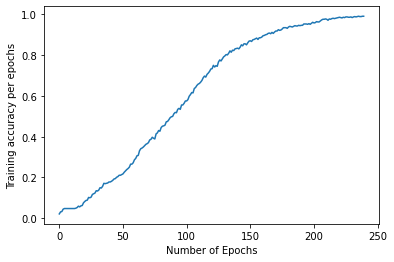

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.xlabel("Number of Epochs")
plt.ylabel('Training accuracy per epochs')
plt.show()


In [ ]:
#predicting the next word using an initial sentence
seed_text = "Excellent "
next_words = 150
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0] #converting our seed_text to tokens and excluding the out of vcabulary words
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre') #padding the seed_text
    #predicted = model.predict_classes(token_list, verbose=0)
    predict_x=model.predict(token_list) 
    classes_x=np.argmax(predict_x,axis=1)
    output_word = "" #initialising output word as blank at the beginning
    for word, index in tokenizer.word_index.items():
        if index == classes_x:
            output_word = word #converting the token back to the corresponding word and storing it in the output_word
            break
    seed_text += " " + output_word
print(seed_text)


1/1 [==============================] - 0s 52ms/step
Excellent  consider this review this film as i have a my daughter pointed out when she saw the film she loved that the men in the movie are not afraid to crysomething you rarely see in western films as for the plot its very long and involved and i could recount what occurs but i dont want to spoil a single wonderful moment so my advice is just sit back and watchand if you give it a chance i can almost guarantee youll have a great time with this poignant and funny film wonderful and well worth your timewith a delightful script wonderful characters and lots of moments that made me smileand a few that brought me to tears see this film i asked my coworkers to recommend a bollywood movie i expected dumb and dumber by the title it wasnt that at all it is more of an inspirational comedy


In [53]:
generated_review = pd.Series(["Excellent  consider this review this film as i have a my daughter pointed out when she saw the film she loved that the men in the movie are not afraid to crysomething you rarely see in western films as for the plot its very long and involved and i could recount what occurs but i dont want to spoil a single wonderful moment so my advice is just sit back and watchand if you give it a chance i can almost guarantee youll have a great time with this poignant and funny film"])
X = preprocess_reviews(generated_review).values
X_token = tokenizer.texts_to_sequences(X)

maxlen = model.layers[0].input_shape[1] # note: may be fragile
X_token = pad_sequences(X_token, padding='pre', maxlen=maxlen)
preds = model.predict(X_token).flatten()
print(f"p(Positive) = {preds[0]}, so this review is predicted {'positive' if (preds >= 0.5).astype(int) else 'negative'}")

1/1 [==============================] - 0s 16ms/step
p(Positive) = 0.9994044899940491, so this review is predicted positive


# Model 5 GRU Increased the neurons for GRU and Reduced the dense layer neurons and changed optimizers to Adagrad

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 100, 50)           5718000   
                                                                 
 gru_1 (GRU)                 (None, 100)               45600     
                                                                 
 dense_25 (Dense)            (None, 1)                 101       
                                                                 
Total params: 5,763,701
Trainable params: 5,763,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1250/1250 [==============================] - 122s 93ms/step - loss: 0.6930 - accuracy: 0.5052 - val_loss: 0.6930 - val_accuracy: 0.5078
Epoch 2/5
1250/1250 [==============================] - 124s 99ms/step - loss: 0.6928 - accuracy: 0.5236 - val_loss: 0.6928 - val_accuracy: 0.5192
Epoch 3/5
1250/

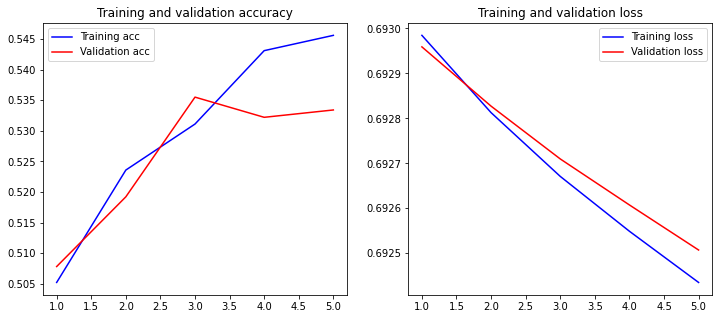

In [ ]:
maxlen = 100
X_train = pad_sequences(X_train_token, padding='pre', maxlen=maxlen)
X_test = pad_sequences(X_test_token, padding='pre', maxlen=maxlen)

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GRU(100,activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='Adagrad',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train,
                    epochs=5,
                    # verbose=True,
                    validation_data=(X_test, y_test))#,
                    # batch_size=50)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

# Model 6 to n: couldn't beat RNN

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 100, 50)           5718000   
                                                                 
 gru_3 (GRU)                 (None, 100)               45600     
                                                                 
 dense_27 (Dense)            (None, 1)                 101       
                                                                 
Total params: 5,763,701
Trainable params: 5,763,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1250/1250 [==============================] - 167s 131ms/step - loss: 0.8280 - accuracy: 0.7821 - val_loss: 0.3183 - val_accuracy: 0.8618
Epoch 2/5
1250/1250 [==============================] - 165s 132ms/step - loss: 0.3084 - accuracy: 0.8706 - val_loss: 0.3052 - val_accuracy: 0.8718
Epoch 3/5
125

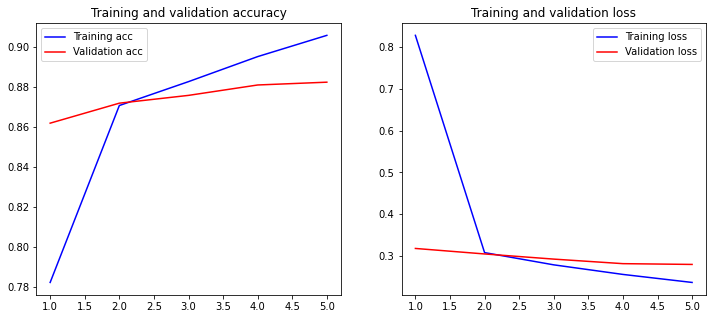

In [ ]:
maxlen = 100
X_train = pad_sequences(X_train_token, padding='pre', maxlen=maxlen)
X_test = pad_sequences(X_test_token, padding='pre', maxlen=maxlen)

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GRU(100,activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='RMSProp',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train,
                    epochs=5,
                    # verbose=True,
                    validation_data=(X_test, y_test))#,
                    # batch_size=50)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, 100, 50)           5718000   
                                                                 
 lstm_3 (LSTM)               (None, 100)               60400     
                                                                 
 dense_28 (Dense)            (None, 10)                1010      
                                                                 
 dense_29 (Dense)            (None, 10)                110       
                                                                 
 dense_30 (Dense)            (None, 10)                110       
                                                                 
 dense_31 (Dense)            (None, 10)                110       
                                                                 
 dense_32 (Dense)            (None, 10)              

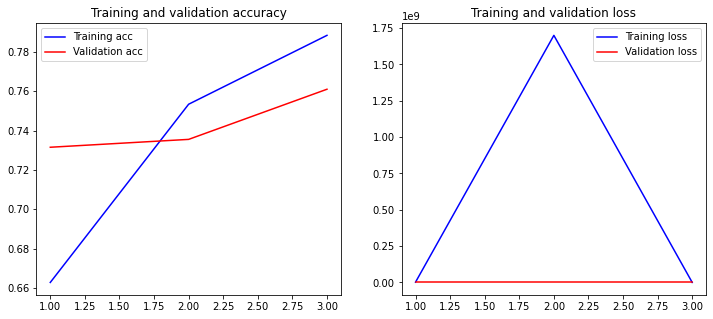

In [ ]:
maxlen = 100
X_train = pad_sequences(X_train_token, padding='pre', maxlen=maxlen)
X_test = pad_sequences(X_test_token, padding='pre', maxlen=maxlen)

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.LSTM(100,activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train,
                    epochs=3,
                    # verbose=True,
                    validation_data=(X_test, y_test))#,
                    # batch_size=50)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          11236400  
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dense_6 (Dense)             (None, 10)               

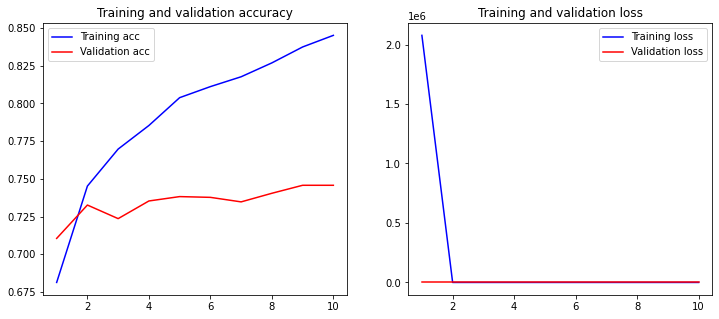

In [54]:
maxlen = 100
X_train = pad_sequences(X_train_token, padding='pre', maxlen=maxlen)
X_test = pad_sequences(X_test_token, padding='pre', maxlen=maxlen)

embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.LSTM(100,activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train,
                    epochs=10,
                    # verbose=True,
                    validation_data=(X_test, y_test))#,
                    # batch_size=50)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

# Applying the best model we got to the different data set 

In [ ]:
def predict_pos(reviews, model):
    X = preprocess_reviews(reviews).values
    X_token = tokenizer.texts_to_sequences(X)

    maxlen = model.layers[0].input_shape[1] # note: may be fragile
    X_token = pad_sequences(X_token, padding='pre', maxlen=maxlen)
    preds = model.predict(X_token).flatten()
    return (preds >= 0.5).astype(int)

predict_pos(movie_df['review'], model)

24/24 [==============================] - 0s 9ms/step


array([1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,

In [ ]:
#path = "/content/drive/MyDrive/Deep-Learning-Movie-Reviews/2_reviews_per_movie_raw/"
path = "../2_reviews_per_movie_raw/"

dir_list = os.listdir(path)

print(len(dir_list))
res = []
for fname in dir_list:
    movie_df = pd.read_csv(path + fname)
    preds = predict_pos(movie_df['review'], model)
    res.append({
    "Movie": fname,
    "Positive": np.sum(preds),
    "Negative": len(preds) - np.sum(preds),
    "Mean": np.mean(preds)
  })

# print(res)
pd.DataFrame(res)

1150
30/30 [==============================] - 0s 8ms/step


8/8 [==============================] - 0s 9ms/step


34/34 [==============================] - 0s 9ms/step


40/40 [==============================] - 0s 10ms/step


114/114 [==============================] - 1s 11ms/step


22/22 [==============================] - 0s 11ms/step


30/30 [==============================] - 0s 12ms/step


9/9 [==============================] - 0s 12ms/step


,Movie,Positive,Negative,Mean
0,10 Cloverfield Lane 2016.csv,562,190,0.747340
1,10 Things I Hate About You 1999.csv,450,161,0.736498
2,12 Angry Men 1957.csv,1079,432,0.714097
3,12 Monkeys 1995.csv,457,176,0.721959
4,12 Strong 2018.csv,293,78,0.789757
...,...,...,...,...
1145,Zero Dark Thirty 2012.csv,539,170,0.760226
1146,Zodiac 2007.csv,570,197,0.743155
1147,Zombieland 2009.csv,541,172,0.758766
1148,Zootopia 2016.csv,511,190,0.728959


In [ ]:
pd.DataFrame(res).to_csv('/content/drive/MyDrive/Deep-Learning-Movie-Reviews/model-outputs/model12062022.csv', mode='a', header=True)

In [15]:
# (uncomment if running at a later time)
# res = pd.read_csv('/content/drive/MyDrive/Deep-Learning-Movie-Reviews/model-outputs/model12062022.csv')

In [41]:
path = "/content/drive/MyDrive/Deep-Learning-Movie-Reviews/1_movies_per_genre/"
genres_list = os.listdir(path)
movies_df = pd.DataFrame()
for fname in genres_list:
  movie_df = pd.read_csv(path + fname)
  movies_df = pd.concat([movies_df, movie_df])

# drop duplicates, since some movies are in multiple genre files
movies_df = movies_df.drop_duplicates(subset=('name', 'year'))

# add a column with the corresponding csv file
movies_df['reviews_csv'] = movies_df['name'] + ' ' + movies_df['year'].astype(str) + '.csv'

movies_df

,name,year,movie_rated,run_length,genres,release_date,rating,num_raters,num_reviews,review_url,reviews_csv
0,The Dark Knight,2008,PG-13,2h 32min,Action; Crime; Drama;,18 July 2008 (USA),9.0,2224522,6836,https://www.imdb.com/title/tt0468569/reviews/_...,The Dark Knight 2008.csv
1,Inception,2010,PG-13,2h 28min,Action; Adventure; Sci-Fi;,16 July 2010 (USA),8.8,1981675,3820,https://www.imdb.com/title/tt1375666/reviews/_...,Inception 2010.csv
2,The Matrix,1999,R,2h 16min,Action; Sci-Fi;,31 March 1999 (USA),8.7,1619761,4281,https://www.imdb.com/title/tt0133093/reviews/_...,The Matrix 1999.csv
3,The Lord of the Rings: The Fellowship of the Ring,2001,PG-13,2h 58min,Action; Adventure; Drama;,19 December 2001 (USA),8.8,1609165,5365,https://www.imdb.com/title/tt0120737/reviews/_...,The Lord of the Rings: The Fellowship of the R...
4,The Dark Knight Rises,2012,PG-13,2h 44min,Action; Adventure;,20 July 2012 (USA),8.4,1470329,2979,https://www.imdb.com/title/tt1345836/reviews/_...,The Dark Knight Rises 2012.csv
...,...,...,...,...,...,...,...,...,...,...,...
92,The Happening,2008,R,1h 31min,Drama; Mystery; Sci-Fi;,13 June 2008 (USA),5.0,192408,1379,https://www.imdb.com/title/tt0949731/reviews/_...,The Happening 2008.csv
93,The Number 23,2007,R,1h 38min,Crime; Mystery; Thriller;,23 February 2007 (USA),6.4,190439,414,https://www.imdb.com/title/tt0481369/reviews/_...,The Number 23 2007.csv
94,The Secret in Their Eyes,2009,R,2h 9min,Drama; Mystery; Romance;,21 May 2010 (USA),8.2,186147,291,https://www.imdb.com/title/tt1305806/reviews/_...,The Secret in Their Eyes 2009.csv
97,Dark City,1998,R,1h 40min,Mystery; Sci-Fi; Thriller;,27 February 1998 (USA),7.6,184177,679,https://www.imdb.com/title/tt0118929/reviews/_...,Dark City 1998.csv


In [42]:
# left join review counts to movie info
movies_df = movies_df.set_index('reviews_csv').join(pd.DataFrame(res).set_index('Movie'))

movies_df[['name', 'year', 'Positive', 'Negative', 'Mean']]

,name,year,Positive,Negative,Mean
reviews_csv,,,,,
The Dark Knight 2008.csv,The Dark Knight,2008,5050.0,1659.0,0.752720
Inception 2010.csv,Inception,2010,2553.0,1157.0,0.688140
The Matrix 1999.csv,The Matrix,1999,2842.0,1330.0,0.681208
The Lord of the Rings: The Fellowship of the Ring 2001.csv,The Lord of the Rings: The Fellowship of the Ring,2001,NaN,NaN,NaN
The Dark Knight Rises 2012.csv,The Dark Knight Rises,2012,1962.0,991.0,0.664409
...,...,...,...,...,...
The Happening 2008.csv,The Happening,2008,343.0,1036.0,0.248731
The Number 23 2007.csv,The Number 23,2007,176.0,237.0,0.426150
The Secret in Their Eyes 2009.csv,The Secret in Their Eyes,2009,243.0,45.0,0.843750


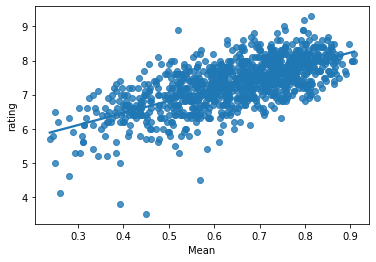

In [38]:
import seaborn as sb
import matplotlib.pyplot as plt

sb.regplot(x = "Mean", y = "rating", ci = None, data = movies_df)

In [39]:
import statsmodels.formula.api as smf
reg = smf.ols('Mean ~ rating', data = movies_df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Mean   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     862.4
Date:                Thu, 08 Dec 2022   Prob (F-statistic):          1.77e-138
Time:                        19:19:50   Log-Likelihood:                 890.38
No. Observations:                1040   AIC:                            -1777.
Df Residuals:                    1038   BIC:                            -1767.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2938      0.032     -9.155      0.000      -0.357      -0.231
rating         0.1280      0.004     29.367      0.000       0.119       0.137
==============================================================================
Omnibus:                       13.451   Durbin-Watson:                   1.526
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               12.818
Skew:                          -0.235   Prob(JB):                      0.00165
Kurtosis:                       2.726   Cond. No.                         75.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
action = pd.read_csv('movies_reviews\Action.csv') 

In [ ]:
action = list(action['name']) 
for i in range(len(action)):
    action[i] = action[i].replace(':','_')

In [ ]:
path = '../2_reviews_per_movie_raw/'
dir_list = Movies_results['Movie']
 
#print("Files and directories in '", path, "' :")
 
# prints all files
for i in range(len(dir_list)):
    
    
    Movies_results['Movie'] = dir_list[i].replace('.csv','')
    dir_list[i] = dir_list[i][:len(dir_list[i]) - 5]
    
    
print(dir_list)

<ipython-input-124-7f3f64fe2594>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dir_list[i] = dir_list[i].replace('.csv','')
<ipython-input-124-7f3f64fe2594>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dir_list[i] = dir_list[i][:len(dir_list[i]) - 5]


0              10 Cloverfield Lane
1       10 Things I Hate About You
2                     12 Angry Men
3                       12 Monkeys
4                        12 Strong
                   ...            
1145              Zero Dark Thirty
1146                        Zodiac
1147                    Zombieland
1148                      Zootopia
1149                          Zulu
Name: Movie, Length: 1150, dtype: object


In [ ]:
[i for i in action if i in dir_list]

100

In [ ]:
for i in range(len(action)):
    if action[i] in Movies_results['Movie'] in a
    Movies_results['gener'].iloc[i] = 